#📌 Extracão

In [95]:
import requests
import pandas as pd
import numpy as np
# URL do JSON cru (raw) no GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Requisição HTTP
response = requests.get(url)
response.raise_for_status()  # erro se falhar

# Carregar JSON
data = response.json()


# Normalizar os dados aninhados
df = pd.json_normalize(
    data,
    sep="."  # separador para criar colunas compostas
)

# Ajustar nomes de colunas conforme o dicionário
df.rename(columns={
    "customer.gender": "gender",
    "customer.SeniorCitizen": "SeniorCitizen",
    "customer.Partner": "Partner",
    "customer.Dependents": "Dependents",
    "customer.tenure": "tenure",
    "phone.PhoneService": "PhoneService",
    "phone.MultipleLines": "MultipleLines",
    "internet.InternetService": "InternetService",
    "internet.OnlineSecurity": "OnlineSecurity",
    "internet.OnlineBackup": "OnlineBackup",
    "internet.DeviceProtection": "DeviceProtection",
    "internet.TechSupport": "TechSupport",
    "internet.StreamingTV": "StreamingTV",
    "internet.StreamingMovies": "StreamingMovies",
    "account.Contract": "Contract",
    "account.PaperlessBilling": "PaperlessBilling",
    "account.PaymentMethod": "PaymentMethod",
    "account.Charges.Monthly": "MonthlyCharges",
    "account.Charges.Total": "TotalCharges"
}, inplace=True)


In [96]:
print(df.shape)



(7267, 21)


In [97]:
print(df.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [98]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformação

In [99]:
df.dropna(subset=["Churn"], inplace=True)

In [100]:
print(df["Churn"].value_counts())
print("Quantidade Total:", df["Churn"].isna().sum()+df["Churn"].value_counts().sum())

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Quantidade Total: 7267


In [101]:
# Criar coluna Contas_Diarias
df["Contas_Diarias"] = df["MonthlyCharges"] / 30

# Verificar resultado
print(df[["MonthlyCharges", "Contas_Diarias"]].head(15))


    MonthlyCharges  Contas_Diarias
0            65.60        2.186667
1            59.90        1.996667
2            73.90        2.463333
3            98.00        3.266667
4            83.90        2.796667
5            69.40        2.313333
6           109.70        3.656667
7            84.65        2.821667
8            48.20        1.606667
9            90.45        3.015000
10           45.20        1.506667
11          116.80        3.893333
12           68.95        2.298333
13          101.30        3.376667
14           45.05        1.501667


In [106]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


##Padronização e Transformação de Dados
- "Yes" → 1

- "No" → 0

- "No internet service" ou "No phone service" → -1

In [111]:
# Lista das colunas binárias/categóricas a converter
cols_service = [
    "Churn","SeniorCitizen","Partner","PaperlessBilling","Dependents","PhoneService",
    "MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
    "StreamingTV","StreamingMovies"
]

# Mapeamento
mapa = {
    "Yes": 1,
    "No": 0,
    "No internet service": -1,
    "No phone service": -1
}

# Replace empty strings in 'Churn' column with 'No'
df["Churn"].replace("", "No", inplace=True)

# Aplicar transformação
for col in cols_service:
    df[col] = df[col].replace(mapa).astype("float64")  # garante colunas numéricas com suporte a NaN

# Replace empty strings with NaN and convert 'TotalCharges' to float
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype("float64")

# Fill any NaN values in 'TotalCharges' with 0 (or another appropriate value)
df['TotalCharges'] = df['TotalCharges'].fillna(0)


# Verificar tipos após conversão
print(df[cols_service].dtypes)
print(df["TotalCharges"].dtype)

Churn               float64
SeniorCitizen       float64
Partner             float64
PaperlessBilling    float64
Dependents          float64
PhoneService        float64
MultipleLines       float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
dtype: object
float64


/tmp/ipython-input-1934187195.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Churn"].replace("", "No", inplace=True)


#📊 Carga e análise

##Análise Descritiva
Análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

In [115]:
df.describe(include="all")

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Contas_Diarias
count,7267,7267.000000,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267,...,7267.000000,7267.000000,7267.000000,7267.000000,7267,7267.000000,7267,7267.000000,7267.000000,7267.000000
unique,7267,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,NaN,NaN,NaN
freq,1,NaN,3675,NaN,NaN,NaN,NaN,NaN,NaN,3198,...,NaN,NaN,NaN,NaN,4005,NaN,2445,NaN,NaN,NaN
mean,NaN,0.257190,NaN,0.162653,0.484106,0.300124,32.346498,0.902711,0.324481,NaN,...,0.125224,0.071969,0.166369,0.169946,NaN,0.593230,NaN,64.720098,2277.182035,2.157337
std,NaN,0.437115,NaN,0.369074,0.499782,0.458343,24.571773,0.296371,0.643295,NaN,...,0.738062,0.708503,0.757553,0.759119,NaN,0.491265,NaN,30.129572,2268.648587,1.004319
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,NaN,0.000000,NaN,18.250000,0.000000,0.608333
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,35.425000,396.200000,1.180833
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,70.300000,1389.200000,2.343333
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,89.875000,3778.525000,2.995833


In [118]:
print("==== Estatísticas Numéricas ====")
print(df[["tenure", "MonthlyCharges", "TotalCharges", "Contas_Diarias"]].describe())

==== Estatísticas Numéricas ====
            tenure  MonthlyCharges  TotalCharges  Contas_Diarias
count  7267.000000     7267.000000   7267.000000     7267.000000
mean     32.346498       64.720098   2277.182035        2.157337
std      24.571773       30.129572   2268.648587        1.004319
min       0.000000       18.250000      0.000000        0.608333
25%       9.000000       35.425000    396.200000        1.180833
50%      29.000000       70.300000   1389.200000        2.343333
75%      55.000000       89.875000   3778.525000        2.995833
max      72.000000      118.750000   8684.800000        3.958333


In [130]:
print(df[["tenure", "MonthlyCharges", "TotalCharges", "Contas_Diarias"]].median())

Churn               0.0
SeniorCitizen       0.0
Partner             0.0
PaperlessBilling    1.0
Dependents          0.0
PhoneService        1.0
MultipleLines       0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64


In [144]:
# Distribuição categórica (proporção %)
print("\n==== Distribuição Categórica ====")
for col in df:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True) * 100)


==== Distribuição Categórica ====

customerID:
customerID
9995-HOTOH    0.013761
0002-ORFBO    0.013761
0003-MKNFE    0.013761
9970-QBCDA    0.013761
9968-FFVVH    0.013761
                ...   
0014-BMAQU    0.013761
0013-SMEOE    0.013761
0013-MHZWF    0.013761
0013-EXCHZ    0.013761
0011-IGKFF    0.013761
Name: proportion, Length: 7267, dtype: float64

Churn:
Churn
0.0    74.280996
1.0    25.719004
Name: proportion, dtype: float64

gender:
gender
Male      50.571075
Female    49.428925
Name: proportion, dtype: float64

SeniorCitizen:
SeniorCitizen
0.0    83.734691
1.0    16.265309
Name: proportion, dtype: float64

Partner:
Partner
0.0    51.589377
1.0    48.410623
Name: proportion, dtype: float64

Dependents:
Dependents
0.0    69.987615
1.0    30.012385
Name: proportion, dtype: float64

tenure:
tenure
1     8.724370
72    5.077749
2     3.385166
3     2.848493
4     2.545755
        ...   
28    0.825650
39    0.811889
44    0.743085
36    0.688042
0     0.151369
Name: proportion,

##Analise da Evasão
parte da analise dos clientes que evadirão

In [124]:
evadidos = df[df["Churn"] == 1]
print(evadidos.shape)

(1869, 22)


In [143]:
for col in df:
    print(f"\n{col}:")
    print(evadidos[col].value_counts(normalize=True) * 100)


customerID:
customerID
9992-RRAMN    0.053505
0004-TLHLJ    0.053505
0011-IGKFF    0.053505
0013-EXCHZ    0.053505
0022-TCJCI    0.053505
                ...   
0125-LZQXK    0.053505
0122-OAHPZ    0.053505
0117-LFRMW    0.053505
0115-TFERT    0.053505
0112-QWPNC    0.053505
Name: proportion, Length: 1869, dtype: float64

Churn:
Churn
1.0    100.0
Name: proportion, dtype: float64

gender:
gender
Female    50.24077
Male      49.75923
Name: proportion, dtype: float64

SeniorCitizen:
SeniorCitizen
0.0    74.531835
1.0    25.468165
Name: proportion, dtype: float64

Partner:
Partner
0.0    64.205457
1.0    35.794543
Name: proportion, dtype: float64

Dependents:
Dependents
0.0    82.557517
1.0    17.442483
Name: proportion, dtype: float64

tenure:
tenure
1     20.331728
2      6.581059
3      5.029428
4      4.440877
5      3.424291
        ...    
72     0.321027
44     0.321027
62     0.267523
64     0.214018
63     0.214018
Name: proportion, Length: 72, dtype: float64

PhoneService:
Phon

In [126]:
evadidos[["tenure", "MonthlyCharges", "TotalCharges", "Contas_Diarias"]].describe()

,tenure,MonthlyCharges,TotalCharges,Contas_Diarias
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094,2.481378
std,19.531123,24.666053,1890.822994,0.822202
min,1.000000,18.850000,18.850000,0.628333
25%,2.000000,56.150000,134.500000,1.871667
50%,10.000000,79.650000,703.550000,2.655000
75%,29.000000,94.200000,2331.300000,3.140000
max,72.000000,118.350000,8684.800000,3.945000


A partir da analise dos dados acima podemos perceber alguns pontos
-  Não existe diferença relevante na propororção do genero dos clientes que evadiram
- Os clientes que evadiram em sua maioria possui fibra otica
- Aproximadamente 88,6% dos clientes pagam mensalmente
- A maioria utiliza pagamento por cheque eletronico
- Quase 75% não possuem idade superior a 65 anos
- O gato mensal esta na media de 74,45
- o Total gasto é em media 1531,80, o que é menor que a media total de  2277.20
- A maioria dos clientes evadidos tinha pelo menos 29 meses de contrato
- A maioria dos clientes evadidos não sofrem da falta de servico, tanto de internet quanto de telefone
- A maioria deste clientes desfrutavam de serviços de assinatura, em comparação a os que não evadiram

##Analise dos Clientes que não Evadiram

In [127]:
clientes = df[df["Churn"] == 0]
print(clientes.shape)

(5398, 22)


In [145]:
for col in df:
    print(f"\n{col}:")
    print(clientes[col].value_counts(normalize=True) * 100)


customerID:
customerID
9995-HOTOH    0.018525
0002-ORFBO    0.018525
0003-MKNFE    0.018525
0013-MHZWF    0.018525
0013-SMEOE    0.018525
                ...   
0019-EFAEP    0.018525
0018-NYROU    0.018525
0017-IUDMW    0.018525
0017-DINOC    0.018525
0016-QLJIS    0.018525
Name: proportion, Length: 5398, dtype: float64

Churn:
Churn
0.0    100.0
Name: proportion, dtype: float64

gender:
gender
Male      50.852167
Female    49.147833
Name: proportion, dtype: float64

SeniorCitizen:
SeniorCitizen
0.0    86.921082
1.0    13.078918
Name: proportion, dtype: float64

Partner:
Partner
1.0    52.778807
0.0    47.221193
Name: proportion, dtype: float64

Dependents:
Dependents
0.0    65.635421
1.0    34.364579
Name: proportion, dtype: float64

tenure:
tenure
72    6.724713
1     4.705446
71    3.149315
2     2.278622
3     2.093368
        ...   
38    0.870693
21    0.870693
39    0.833642
36    0.741015
0     0.203779
Name: proportion, Length: 73, dtype: float64

PhoneService:
PhoneService


In [129]:
clientes[["tenure", "MonthlyCharges", "TotalCharges", "Contas_Diarias"]].describe()

,tenure,MonthlyCharges,TotalCharges,Contas_Diarias
count,5398.000000,5398.000000,5398.000000,5398.000000
mean,37.321045,61.354224,2535.263977,2.045141
std,24.178367,31.105006,2330.802193,1.036834
min,0.000000,18.250000,0.000000,0.608333
25%,14.000000,25.100000,564.362500,0.836667
50%,37.000000,64.500000,1663.625000,2.150000
75%,61.000000,88.637500,4237.275000,2.954583
max,72.000000,118.750000,8672.450000,3.958333


A partir da analise dos dados acima podemos perceber alguns pontos
-  Não existe diferença relevante na propororção do genero dos clientes que evadiram
- Os clientes tem possuem o serviço de internet possuem distribuição parecida
- Quase 30 % dos cleintes não possuem serviço de internet
- Aproximadamente metade dos clientes pagam mensalmente, com distribuição relativamente proxima para cada metodo
- A distribuição do metodo de pagamento é quase a mesma para todas as categorias
- Mais de 85%  possuem idade inferior a 65 anos
- O gato mensal esta na media de 61
- o Total gasto é em media 2535,26, o que é maior que a media total de  2277.20
- por dia é gasto em media 2,05
- O tempo de contrato de quem não evade tende a ser de 37 meses

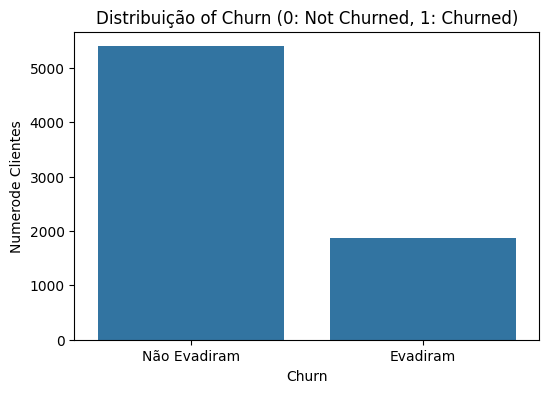

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each Churn value
churn_counts = df['Churn'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribuição of Churn (0: Not Churned, 1: Churned)')
plt.xlabel('Churn')
plt.ylabel('Numerode Clientes')
plt.xticks([0, 1], ['Não Evadiram', 'Evadiram']) # Assuming 0 is No and 1 is Yes
plt.show()

##Analise de Correlção

In [147]:
numerical_df = df.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()

display(correlation_matrix)

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contas_Diarias
Churn,1.000000,0.146733,-0.148546,-0.161384,-0.344079,0.012571,0.035996,0.024150,0.073546,0.084448,0.027770,0.162115,0.160666,0.186666,0.189866,-0.193345,0.189866
SeniorCitizen,0.146733,1.000000,0.022970,-0.212952,0.018187,0.010060,0.115623,0.082444,0.146275,0.140955,0.068386,0.166059,0.175919,0.157734,0.220388,0.104076,0.220388
Partner,-0.148546,0.022970,1.000000,0.448900,0.377551,0.018828,0.117067,0.090215,0.089499,0.098300,0.074163,0.079868,0.074049,-0.011201,0.097122,0.315409,0.097122
Dependents,-0.161384,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.023195,-0.029402,-0.064207,-0.070022,-0.042790,-0.087142,-0.103102,-0.111752,-0.115832,0.061474,-0.115832
tenure,-0.344079,0.018187,0.377551,0.159892,1.000000,0.010205,0.259340,0.231001,0.253037,0.253381,0.227794,0.200411,0.204225,0.007949,0.247982,0.825407,0.247982
PhoneService,0.012571,0.010060,0.018828,-0.003863,0.010205,1.000000,0.675964,-0.160843,-0.130208,-0.143747,-0.163279,-0.110570,-0.116135,0.013624,0.246709,0.113985,0.246709
MultipleLines,0.035996,0.115623,0.117067,-0.023195,0.259340,0.675964,1.000000,0.068373,0.131296,0.123694,0.066823,0.163714,0.161845,0.131590,0.490385,0.412122,0.490385
OnlineSecurity,0.024150,0.082444,0.090215,-0.029402,0.231001,-0.160843,0.068373,1.000000,0.706885,0.702443,0.736278,0.663421,0.668783,0.188463,0.637022,0.483112,0.637022
OnlineBackup,0.073546,0.146275,0.089499,-0.064207,0.253037,-0.130208,0.131296,0.706885,1.000000,0.713219,0.709105,0.704216,0.701708,0.265546,0.711359,0.538664,0.711359
DeviceProtection,0.084448,0.140955,0.098300,-0.070022,0.253381,-0.143747,0.123694,0.702443,0.713219,1.000000,0.725487,0.750166,0.753714,0.249061,0.738000,0.546512,0.738000


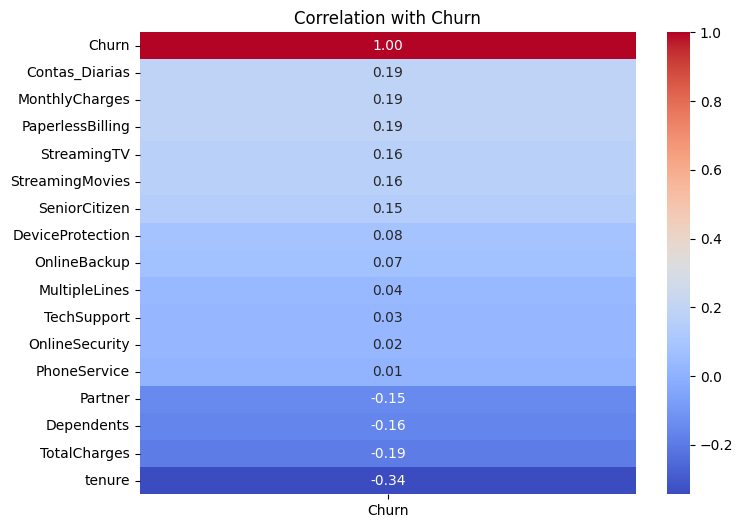

In [148]:
churn_correlation = correlation_matrix[['Churn']].sort_values(by='Churn', ascending=False)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(churn_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Churn')
plt.show()

##Mapa de Calor e Correlação
Como o visto acima, no mapa de calor gerado pela matrix de correlação, temos de forma perceptivel que o tempo restante de contrato, dependentes, pagamento total e se o cliente possui parceiros são grandementes relevantes para encontrar clientes que evadirão

##Grafico de Dispersão

###Dispersão entre tenure e churm


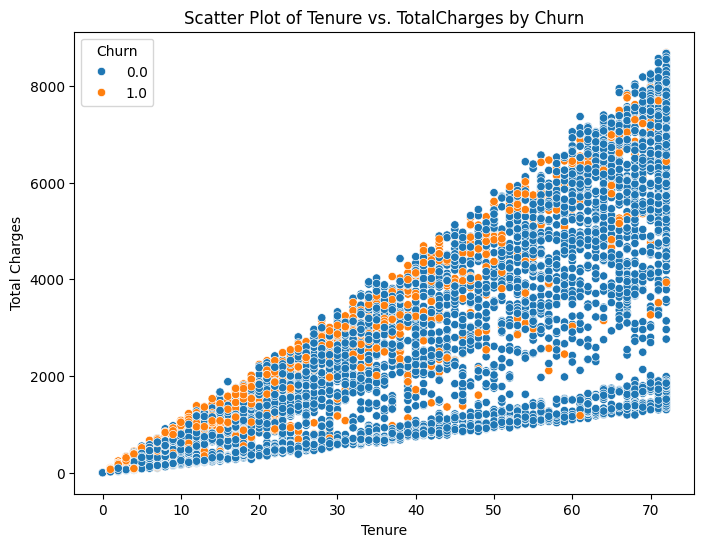

In [149]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
plt.title('Scatter Plot of Tenure vs. TotalCharges by Churn')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.show()

###Grafico de dispersão entre Contas diarias e churn


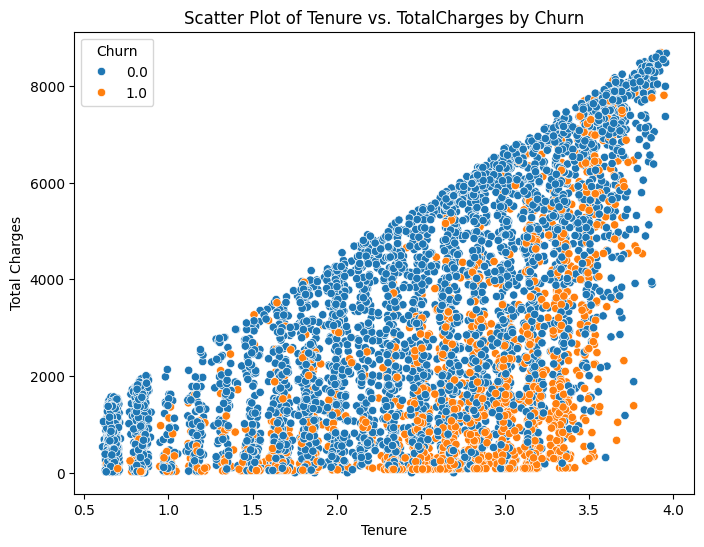

In [150]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Contas_Diarias', y='TotalCharges', hue='Churn')
plt.title('Scatter Plot of COntas Diarias vs. TotalCharges by Churn')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.show()

#📄Relatorio Final
# Database
O database apresenta as informações de clientes da Telecon, atravez deste data base foi realizado a atividade para tentar encontrar caracteristicas dos clientes que evadem. A nescessidade do processo se deve a constante nescessidade de uma empresa entender seus clientes, os que ficam e ainda mais os que deixam, para desta forma poderem continuar crescento e prosperando no mercado.
A primeira atividade foi adiquirir o data base atravez de requisição dos dados disponiveis no link, numa pagina do github do challenger da Alura. Após adiquirir os dados foi realizado uma visualização dos dado e limpeza para retirar valores vazios que impedem de realizar atividades para analise.
A analise se deve atravez da descriminação dos dados e normalização, como por exemplo a transformação dos dados dos quais seus valores booleanos foram alterados para os primitivos 0 e 1, com caracteristica de que informações como falta de serviço foram abstratas na forma de -1
Após analise dos dados foi percebido que


# 📄**Relatorio Final**
# **Database**
O database apresenta as informações de clientes da Telecon, atravez deste data base foi realizado a atividade para tentar encontrar caracteristicas dos clientes que evadem. A nescessidade do processo se deve a constante nescessidade de uma empresa entender seus clientes, os que ficam e ainda mais os que deixam, para desta forma poderem continuar crescento e prosperando no mercado.
A primeira atividade foi adiquirir o data base atravez de requisição dos dados disponiveis no link, numa pagina do github do challenger da Alura. Após adiquirir os dados foi realizado uma visualização dos dado e limpeza para retirar valores vazios que impedem de realizar atividades para analise.
A analise se deve atravez da descriminação dos dados e normalização, como por exemplo a transformação dos dados dos quais seus valores booleanos foram alterados para os primitivos 0 e 1, com caracteristica de que informações como falta de serviço foram abstratas na forma de -1
Após analise dos dados foi percebido que:

*   A base de dados contém informações de 7267 clientes.
*   Aproximadamente 25.7% dos clientes na base de dados evadiram.

## **Análise Descritiva e Comparativa (Clientes que Evadiram vs. Clientes que Não Evadiram):**

*   **Gênero:** Não há diferença significativa na proporção de gênero entre os clientes que evadiram e os que não evadiram.
*   **Serviço de Internet:** Clientes que evadiram têm uma maior proporção de uso de Fibra Óptica em comparação com os que não evadiram. Uma parcela considerável de clientes que não evadiram não possui serviço de internet.
*   **Método de Pagamento:** A maioria dos clientes que evadiram utiliza pagamento por cheque eletrônico. Entre os clientes que não evadiram, a distribuição dos métodos de pagamento é mais equilibrada.
*   **Idade (SeniorCitizen):** Clientes que evadiram têm uma proporção ligeiramente maior de idosos (SeniorCitizen = 1) em comparação com os que não evadiram.
*   **Tempo de Contrato (Tenure):** Clientes que evadiram tendem a ter um tempo de contrato (tenure) significativamente menor (média de aproximadamente 18 meses) do que os clientes que não evadiram (média de aproximadamente 37 meses).
*   **Gastos (MonthlyCharges e TotalCharges):** Clientes que evadiram têm uma média de gastos mensais um pouco maior, mas uma média de gastos totais consideravelmente menor do que os clientes que não evadiram. Isso reforça a observação sobre o menor tempo de contrato dos clientes que evadem.
*   **Serviços Adicionais:** Clientes que evadiram tendem a ter uma menor proporção de serviços adicionais como Online Security, Online Backup, Device Protection e Tech Support em comparação com os clientes que não evadiram. Por outro lado, uma maior proporção de clientes que evadiram desfrutava de serviços de assinatura como StreamingTV e StreamingMovies.

## **Análise de Correlação:**

*   O **tempo de contrato (tenure)** apresenta a correlação negativa mais forte com a evasão, indicando que clientes com contratos mais longos têm menor probabilidade de evadir.
*   O **total gasto (TotalCharges)** também tem uma correlação negativa relevante com a evasão.
*   Variáveis como **MonthlyCharges**, **PaperlessBilling**, **StreamingTV** e **StreamingMovies** apresentam correlações positivas com a evasão, sugerindo que clientes com maiores gastos mensais, que optam por faturamento sem papel e que utilizam serviços de streaming têm uma maior tendência a evadir.
*   A presença de **Parceiro (Partner)** e **Dependentes (Dependents)** apresenta correlação negativa com a evasão, indicando que clientes com parceiros ou dependentes são menos propensos a evadir.
*   A forma de pagamento **(automatic)** tendem a ser maior para clientes que não evadem


## **Conclusão**

Esses pontos fornecem insights valiosos sobre as características dos clientes que tendem a evadir, o que pode ser utilizado para desenvolver estratégias de retenção mais eficazes. Neste é possivel perceber que invesstir em contratos a longo prazo, e o oferecimento de pacotes com maior valor são caracteristicas chaves para retenção do cliente, principalmente o contrato, de acordo com a analise quanto mais proximo do fim, maior é a possibilidade do cliente evadir
Sendo assim recomenda - se
- Criação de planos e contratos Longinquios.
- Bundles que agregem maior percepção valor a o cliente.
- Maior foco em conseguir adiquirir mais clientes que possuam um parceiro ou dependente.
- Mais foco na retenção de clientes que não possuem.
- Incentivar o cliente a engajar em formas de pagamento automaticas.